In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
# 1， 准备数据集，使用tushare来获取股票数据
import tushare as ts
stock_df=ts.get_k_data('600123',start='2008-10-01',end='2018-10-01') # 获取600123这只股票的近十年数据
print(stock_df.info()) # 查看没有错误
print(stock_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425 entries, 181 to 2605
Data columns (total 7 columns):
date      2425 non-null object
open      2425 non-null float64
close     2425 non-null float64
high      2425 non-null float64
low       2425 non-null float64
volume    2425 non-null float64
code      2425 non-null object
dtypes: float64(5), object(2)
memory usage: 151.6+ KB
None
           date   open  close   high    low     volume    code
181  2008-10-06  7.192  6.775  7.192  6.775   70629.31  600123
182  2008-10-07  6.254  6.291  6.441  6.099  131339.12  600123
183  2008-10-08  6.087  6.045  6.199  5.953   60669.99  600123
184  2008-10-09  6.120  5.899  6.145  5.832   75048.73  600123
185  2008-10-10  5.620  5.361  5.620  5.324   58801.60  600123


In [3]:
# 准备数据集，此次我们用两个指标来计算HMM模型，股价涨幅和成交量
close=stock_df.close.values
feature1=100*np.diff(close)/close[:-1] # 股票涨幅的计算
print(close[:10])
print(feature1[:10]) # 查看涨幅计算有没问题

[6.775 6.291 6.045 5.899 5.361 5.436 5.299 4.994 4.494 4.598]
[ -7.14391144  -3.91034812  -2.41521919  -9.12018986   1.39899273
  -2.52023547  -5.75580298 -10.01201442   2.31419671   9.98260113]


In [4]:
# 由于计算涨幅之后的序列比原来的收盘价序列少一个（最开始的股价没法计算涨幅），故而需要减去一个
feature2=stock_df.volume.values[1:]
dataset_X=np.c_[feature1,feature2]
print(dataset_X[:5]) # 检查没错

[[-7.14391144e+00  1.31339120e+05]
 [-3.91034812e+00  6.06699900e+04]
 [-2.41521919e+00  7.50487300e+04]
 [-9.12018986e+00  5.88016000e+04]
 [ 1.39899273e+00  6.61047400e+04]]


In [5]:
# 创建HMM模型，并训练
from hmmlearn.hmm import GaussianHMM
model=GaussianHMM(n_components=5,n_iter=1000) # 暂时假设该股票有5个隐含状态
model.fit(dataset_X)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=5, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

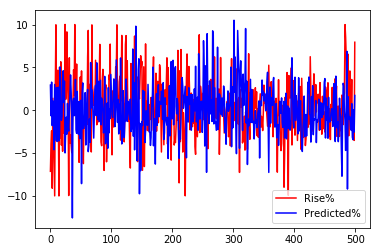

In [6]:
# 使用该模型查看一下效果
N=500
samples,_=model.sample(N)
# 由于此处我使用涨幅作为第一个特征，成交量作为第二个特征进行建模，
# 故而得到的模型第一列就是预测的涨幅，第二列就是成交量
plt.plot(feature1[:N],c='red',label='Rise%') # 将实际涨幅和预测的涨幅绘制到一幅图中方便比较
plt.plot(samples[:,0],c='blue',label='Predicted%')
plt.legend()

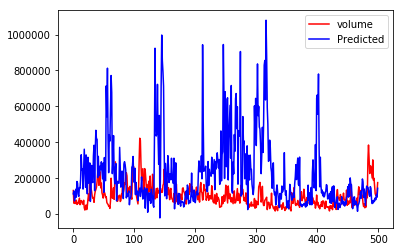

In [7]:
plt.plot(feature2[:N],c='red',label='volume')
plt.plot(samples[:,1],c='blue',label='Predicted')
plt.legend()